Stockpy is a machine learning library designed for stock market prediction. It offers an easy-to-use API that allows users to quickly train and test various models on their own financial datasets. The library includes several state-of-the-art models for time series analysis, such as LSTM, GRU, Bayesian Neural Network and Deep Markov Model. These models can be used to forecast stock prices, analyze market trends, and generate trading signals.

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stockpy.probabilistic import DeepMarkovModel, GaussianHMM, BayesianNN
from stockpy.neural_network import MLP, LSTM, GRU, BiGRU, BiLSTM
from stockpy.metrics import evaluate


# read CSV file and drop missing values
df = pd.read_csv('stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
# split data into training and test set
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

# create model instance and fit to training data
predictor = BiLSTM()
predictor.fit(X_train, batch_size=24, epochs=2)

# predictions on test data
y_pred = predictor.predict(X_test)

 50%|█████     | 1/2 [00:00<00:00,  2.57it/s]

100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

In [2]:
y_test = X_test['Close'].values.reshape(-1,1)
mse, mse_squar, mape = evaluate(y_pred=y_pred, y_test=y_test)

FileNotFoundError: [Errno 2] No such file or directory: '../results/BiGRU.png'

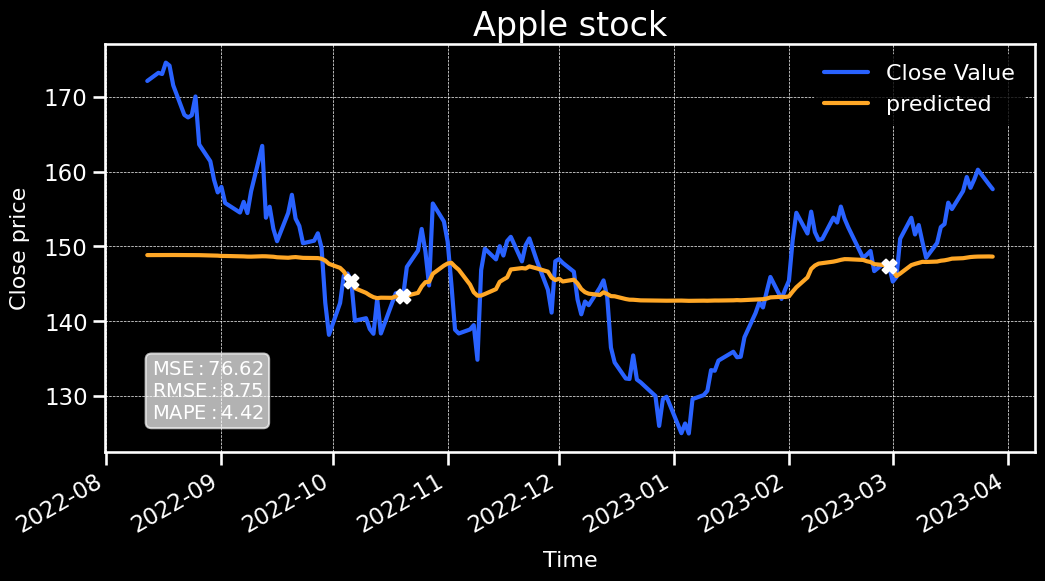

In [3]:
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')
file = '../results/' + predictor.__class__.__name__ + '.png'
fig, ax = plt.subplots(figsize=(12, 6))
days = X_test.index
ax.plot(days, y_test, label='Close Value', linewidth=3, color='#2962FF')
ax.plot(days, y_pred, label='predicted', linewidth=3, color='#FFA726')
ax.set_title('Apple stock', fontsize=24, color='white')
ax.set_xlabel('Time', fontsize=16, color='white', labelpad=10)
ax.set_ylabel('Close price', fontsize=16, color='white', labelpad=10)
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Add crosses at points where predicted value matches true value
for i in range(len(days)):
    if abs(y_test[i] - y_pred[i]) < 0.1:
        ax.scatter(days[i], y_test[i], marker='X', color='white', 
                        s=100, zorder=2)

# put legend in a white box
ax.legend(fontsize=16, loc='upper right', 
          edgecolor='black')

fig.autofmt_xdate()
# these are matplotlib.patch.Patch properties
textstr = '\n'.join((
    r'$\mathrm{MSE}: %.2f$' % (mse, ),
    r'$\mathrm{RMSE}: %.2f$' % (mse_squar, ),  
    r'$\mathrm{MAPE}: %.2f$' % (mape, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.7)

# place a text box in upper left in axes coords
ax.text(0.05, 0.15, textstr, transform=ax.transAxes, fontsize=14,
        ha='left', va='center', bbox=props)
plt.savefig(file, dpi=80, facecolor='#131722')
plt.show()